In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv('wines_data_with_EDA.csv')

In [3]:
wine.head(10)

,product_name,country,grapes_type,short_description,reviews,price(dollar),quantity,year,total_amount(dollar)
0,Bonded Winery No. 2 by The Bundschu Family Son...,United States,Cabernet Sauvignon,Iconic Sonoma Cab Sauvignon,1,54.99,12,2022,659.88
1,Pillastro Primitivo,Italy,Primitivo,94-Point Italian Bestseller,1894,15.99,12,2022,191.88
2,The Black Stump Durif Shiraz,Australia,Durif-based blend,Gold-Medal Aussie Blockbuster,2199,16.99,12,2024,203.88
3,J Opi Malbec,Argentina,Malbec,The Magician's Signature Malbec,1111,16.99,12,2024,203.88
4,Pillastro Primitivo,Italy,Primitivo,Popular Italian Bestseller,1888,15.99,12,2023,191.88
5,Abbesse Sauvignon Blanc,France,Sauvignon Blanc,Fabulous French Sauvignon Blanc,19,18.99,12,2024,227.88
6,w/o Lucido,Italy,Lucido,Organically Grown Sicilian White,43,19.99,12,2024,239.88
7,Queen Bee Viognier,South Africa,Viognier,Elegant South African Viognier,39,19.99,12,2024,239.88
8,Lobo e Falcão,Portugal,Castelão-based blend,Powerful Portuguese Favorite,935,19.99,12,2024,239.88
9,Saracosa,Italy,Sangiovese-based blend,Bestselling Super Tuscan,1085,19.99,12,2024,239.88


# 1.Univariate Analysis

### 1.What is the distribution of wine prices across the dataset?

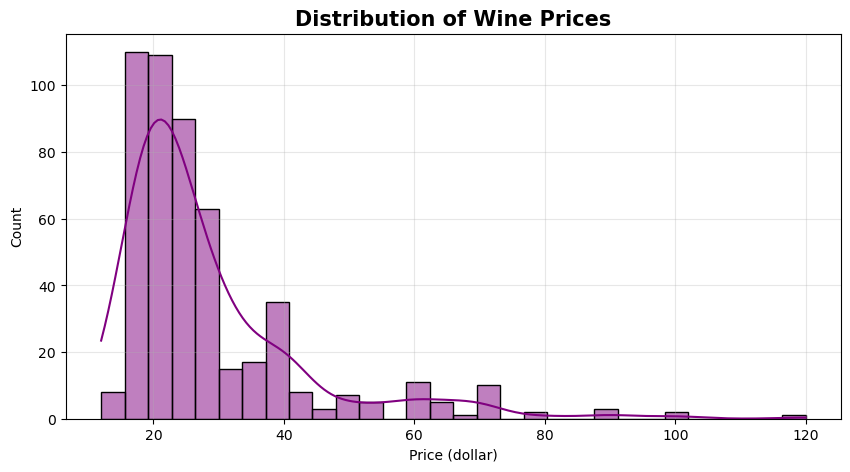

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(wine['price(dollar)'], bins=30, kde=True, color='purple')
plt.title("Distribution of Wine Prices", fontsize=15, fontweight='bold')
plt.xlabel("Price (dollar)")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()


### Insights
- Most wines are priced between **`$15 to  $30`**, showing this is the common price range.
- The price distribution is **right-skewed**, meaning there are fewer high-priced wines.
- **Expensive wines (above $50)** are rare and appear as **outliers** in the dataset.


### 2.Which countries have the highest number of wines listed?

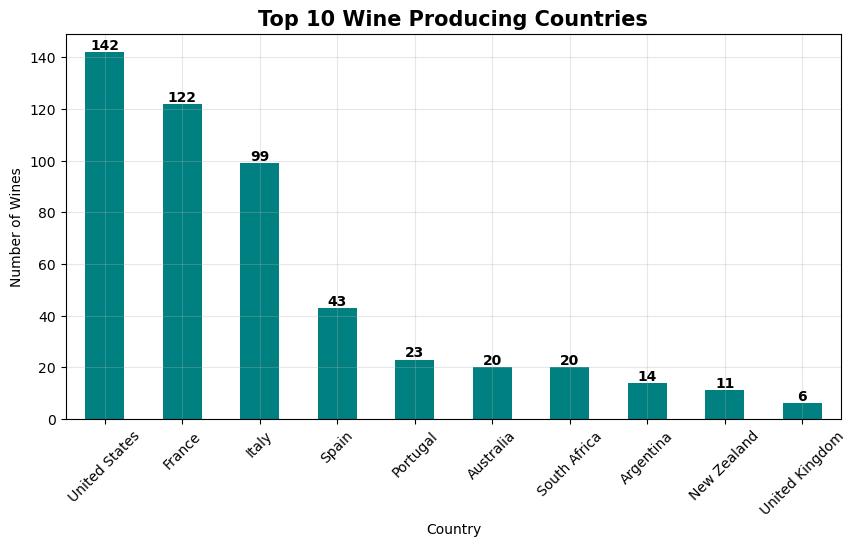

In [5]:
# Top 10
plt.figure(figsize=(10,5))
country_counts = wine['country'].value_counts().head(10)

bars = country_counts.plot(kind='bar', color='teal')
plt.title("Top 10 Wine Producing Countries", fontsize=15, fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Number of Wines")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

for i, value in enumerate(country_counts):
    plt.text(i, value + 1, str(value), ha='center', fontsize=10, fontweight='bold', color='black')

plt.show()



### Insights
- The **United States**, **France**, and **Italy** are the top wine-producing countries in the dataset.
- The United States leads with the highest number of wines, followed closely by France.
- There is a significant drop after the top three countries, with **Spain** and **Portugal** producing comparatively fewer wines.
- Countries like **New Zealand** and the **United Kingdom** contribute very few wines, indicating smaller wine production presence in the dataset.


### 3.What are the most common grape (grapes_type) varieties used in wines?

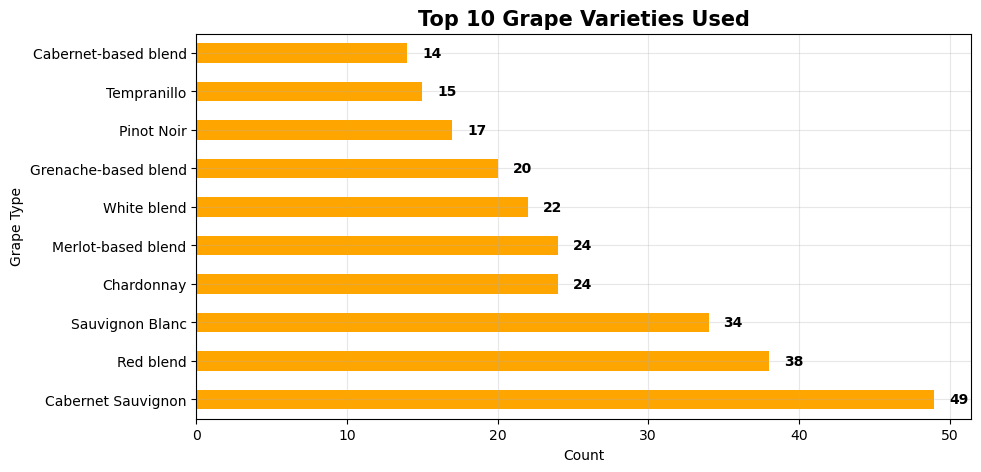

In [6]:
plt.figure(figsize=(10,5))
grape_counts = wine['grapes_type'].value_counts().head(10)

bars = grape_counts.plot(kind='barh', color='orange')
plt.title("Top 10 Grape Varieties Used", fontsize=15, fontweight='bold')
plt.xlabel("Count")
plt.ylabel("Grape Type")
plt.grid(alpha=0.3)

for i, value in enumerate(grape_counts):
    plt.text(value + 1, i, str(value), va='center', fontsize=10, fontweight='bold', color='black')

plt.show()


### Insights
- **Cabernet Sauvignon** is the most commonly used grape variety in the dataset.
- **Red blend** and **Sauvignon Blanc** are also widely used, indicating high popularity.
- Varieties like **Tempranillo** and **Cabernet-based blends** are less common among the top varieties.
- The dataset shows a mix of **red and white grape varieties**, with red grapes being slightly more dominant.


### 4.To identify which wine products are the most frequently listed in the dataset.

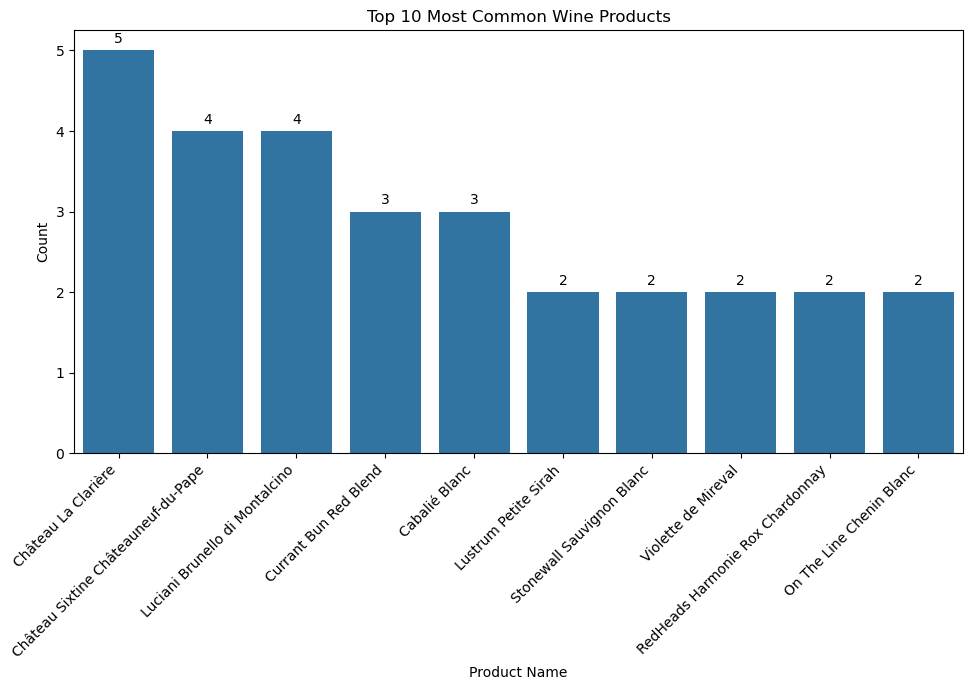

In [45]:
# Get top 10 products
product_counts = wine['product_name'].value_counts()
top_10 = product_counts.head(10)

# Convert to DataFrame for Seaborn
df_products = top_10.reset_index()
df_products.columns = ['product_name', 'count']

plt.figure(figsize=(10, 7))
ax = sns.barplot(data=df_products, x='product_name', y='count', color=sns.color_palette()[0])

# Add data labels
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.title("Top 10 Most Common Wine Products")
plt.xlabel("Product Name")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Insights
- **Château La Clarière** is the most commonly occurring wine product in the dataset.
- Other frequently found wines include **Château Sixtine Châteauneuf-du-Pape** and **Luciani Brunello di Montalcino**.
- Most products appear only **2 to 4 times**, suggesting the dataset contains a **wide variety** of unique wine labels.
- Overall, there is **no single product dominating** the dataset, indicating a **diverse product range**.


### 5.To study the distribution of customer review counts.

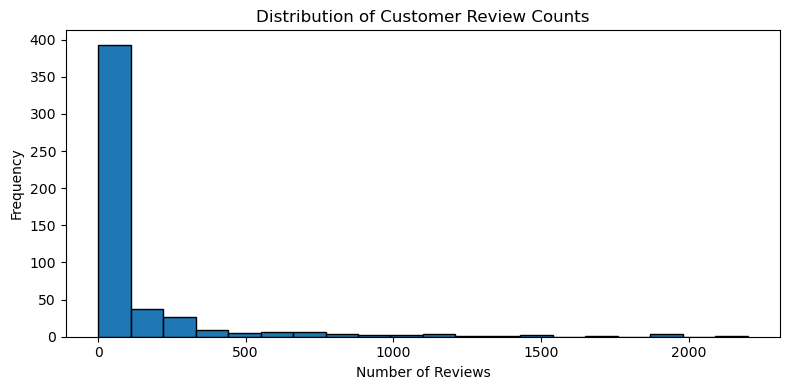

In [8]:
plt.figure(figsize=(8,4))
plt.hist(wine['reviews'], bins=20, edgecolor='black')
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.title("Distribution of Customer Review Counts")
plt.tight_layout()
plt.show()

### Insights
- Most wines have **very few customer reviews**, indicating that many products are less reviewed or niche.
- The distribution is **highly right-skewed**, with only a few wines receiving **very high review counts**.
- A small number of wines stand out with **hundreds to thousands of reviews**, showing they are **much more popular** or widely recognized.
- Overall, customer engagement varies significantly, with **few popular wines and many less-known ones**.


### 6.To examine the distribution of quantity values to determine the most commonly offered packaging or purchase size.

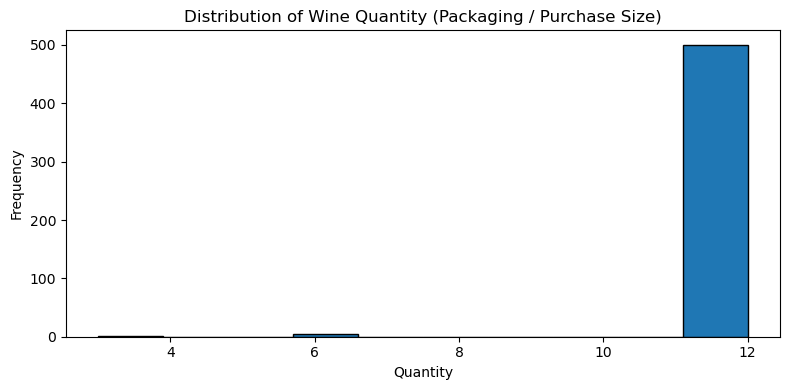

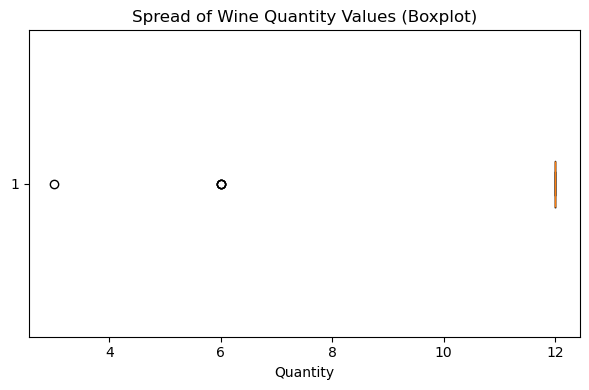

In [9]:
plt.figure(figsize=(8,4))
plt.hist(wine['quantity'], bins=10, edgecolor='black')
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Distribution of Wine Quantity (Packaging / Purchase Size)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(wine['quantity'], vert=False)
plt.xlabel("Quantity")
plt.title("Spread of Wine Quantity Values (Boxplot)")
plt.tight_layout()
plt.show()

### Insights
- Most wines are packaged or sold in a **quantity of 12**, making it the most common purchase size.
- Very few wines are available in **smaller quantities** like 3 or 6, which appear as **outliers** in the boxplot.
- The distribution shows **little variation**, indicating that standard case packaging (12)


### 7. identify the most frequent vintages available.

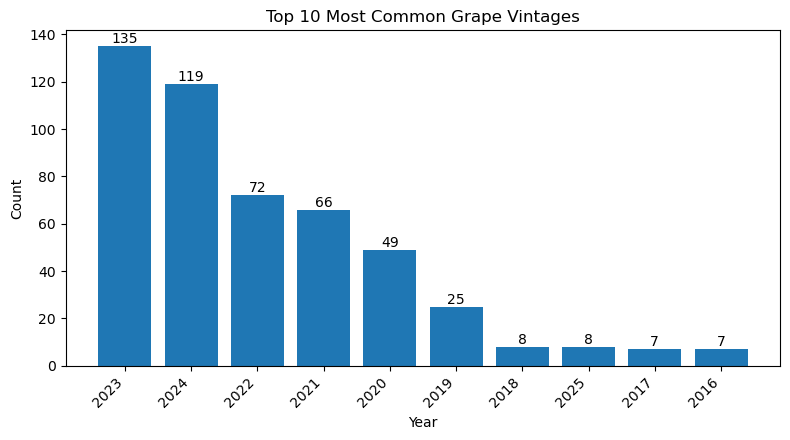

In [40]:
year_counts = wine['year'].value_counts().head(10)

plt.figure(figsize=(8,4.5))
bars = plt.bar(year_counts.index.astype(str), year_counts.values)

# Add data labels
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y, str(y),
             ha='center', va='bottom', fontsize=10)

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Top 10 Most Common Grape Vintages")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Insights
- **2023** is the most common grape vintage, followed by **2024**, showing that most wines in the dataset are **recently produced**.
- There is a gradual **decrease in the number of wines** from older vintages like **2021, 2020, and 2019**.
- **Very few wines** come from vintages earlier than **2018**, indicating that **aged wines are less common** in this dataset.
- Overall, the dataset is **dominated by new and fresh vintages**, suggesting a focus on recent wine production.


### 8.To study the distribution of total sale amounts in order to identify high-value and low-value wine listings.

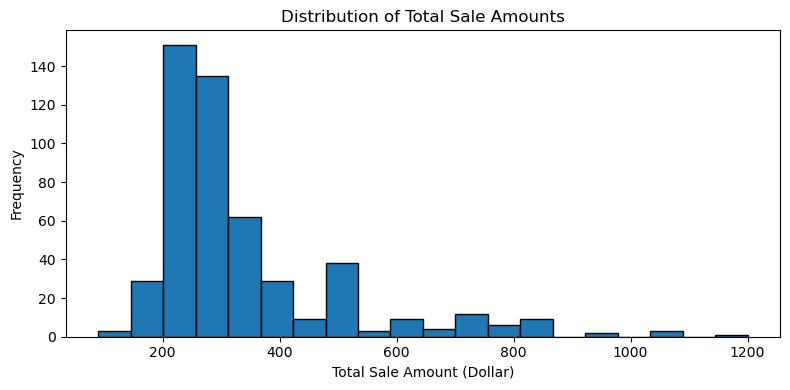

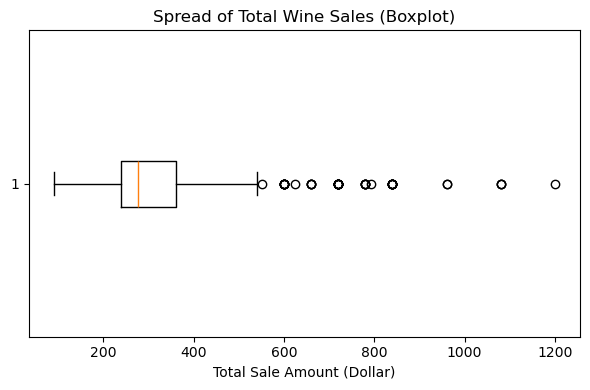

In [11]:
plt.figure(figsize=(8,4))
plt.hist(wine['total_amount(dollar)'], bins=20, edgecolor='black')
plt.xlabel("Total Sale Amount (Dollar)")
plt.ylabel("Frequency")
plt.title("Distribution of Total Sale Amounts")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(wine['total_amount(dollar)'], vert=False)
plt.xlabel("Total Sale Amount (Dollar)")
plt.title("Spread of Total Wine Sales (Boxplot)")
plt.tight_layout()
plt.show()


### Insights
- Most total wine sale amounts fall between **`$200 and $400`**, indicating that this is the most common spending range.
- The distribution is **right-skewed**, meaning a few transactions have **very high sales amounts** (above $600).
- The boxplot shows several **outliers**, representing **premium or bulk purchases**.
- Overall, while most sales are moderate, there are occasional **high-value transactions** that push up the total sales range.


# 2.Bivariate Analysis

### 1. How are vintage years distributed among wine price?

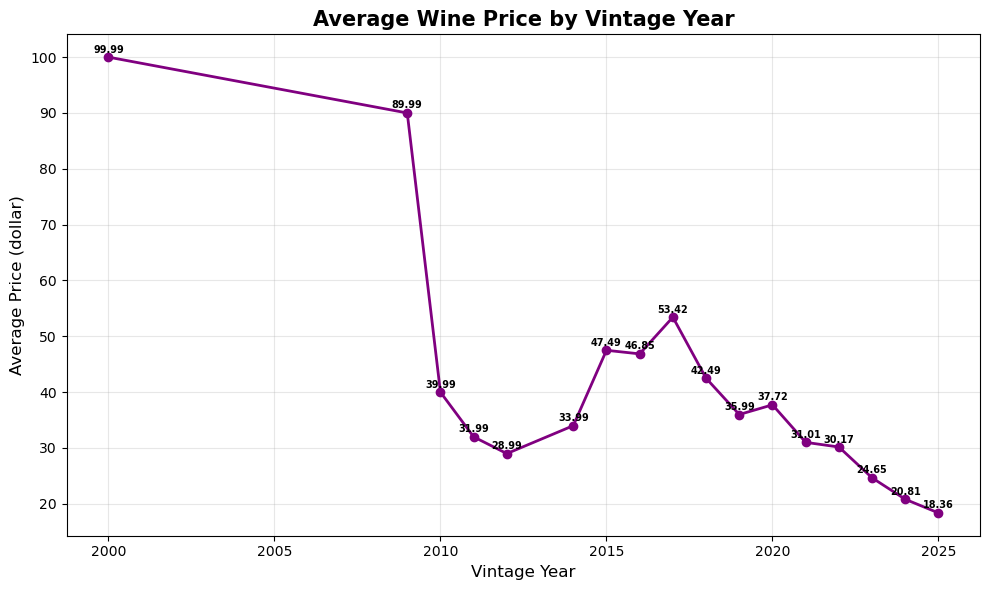

In [12]:

avg_price = wine.groupby('year')['price(dollar)'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(avg_price['year'], avg_price['price(dollar)'], marker='o', color='purple', linewidth=2)

# Add average price labels above each point
for i in range(len(avg_price)):
    plt.text(avg_price['year'][i], 
             avg_price['price(dollar)'][i] + 0.8,  # a little above the point
             f"{avg_price['price(dollar)'][i]:.2f}",  # format to 2 decimals
             ha='center', fontsize=7, fontweight='bold', color='black')

plt.title("Average Wine Price by Vintage Year", fontsize=15, fontweight='bold')
plt.xlabel("Vintage Year", fontsize=12)
plt.ylabel("Average Price (dollar)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



### Insights
- Older vintages (like **2000 to 2009**) have **much higher average prices**, showing that aged wines are generally more expensive.
- After 2010, the **average wine price noticeably drops**, indicating more affordable and younger wines in recent years.
- There is a small price rise around **2015–2017**, suggesting these vintages may be considered better quality or more in demand.
- The most recent vintages (**2022–2025**) have the **lowest average prices**, reflecting that newly produced wines are typically cheaper than aged ones.


### 2.What is the relationship between country and average wine price?

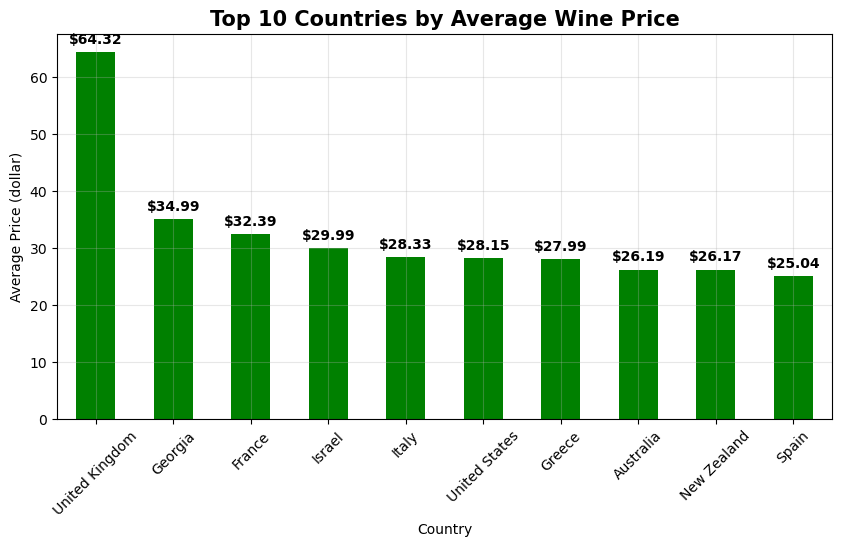

In [13]:
avg_country_price = wine.groupby('country')['price(dollar)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
bars = avg_country_price.plot(kind='bar', color='green')

plt.title("Top 10 Countries by Average Wine Price", fontsize=15, fontweight='bold')
plt.xlabel("Country")
plt.ylabel("Average Price (dollar)")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

for i, value in enumerate(avg_country_price):
    plt.text(i, value + 1, f"${value:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.show()


### Insights
- The **United Kingdom** has the **highest average wine price**, significantly higher than all other countries.
- Countries like **Georgia** and **France** also show relatively higher average prices, indicating a market for premium wines.
- **Spain, New Zealand, and Australia** have the **lowest average wine prices**, suggesting more affordable wine options.
- Overall, the chart shows that **average wine prices vary widely between countries**, likely due to differences in production, quality, and market positioning.


### 3.How does number of reviews relate to wine price?

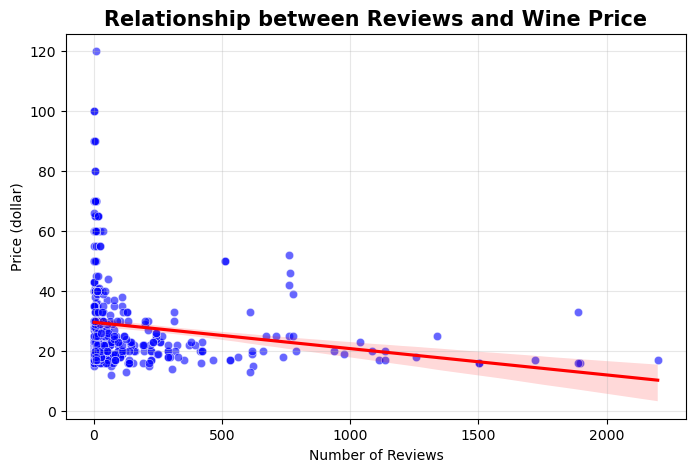

In [14]:
wine['reviews'] = pd.to_numeric(wine['reviews'], errors='coerce')
df_reviews = wine.dropna(subset=['reviews', 'price(dollar)'])

plt.figure(figsize=(8,5))
sns.scatterplot(x='reviews', y='price(dollar)', data=df_reviews, color='blue', alpha=0.6)
sns.regplot(x='reviews', y='price(dollar)', data=df_reviews, scatter=False, color='red')
plt.title("Relationship between Reviews and Wine Price", fontsize=15, fontweight='bold')
plt.xlabel("Number of Reviews")
plt.ylabel("Price (dollar)")
plt.grid(alpha=0.3)
plt.show()


### Insights
- There is **no strong positive relationship** between the number of reviews and wine price.
- Many **low-priced wines** still receive **high numbers of reviews**, showing popularity does not always mean higher price.
- Higher-priced wines tend to have **fewer reviews**, suggesting they are **less commonly purchased** or cater to a niche market.
- The slight **downward trend** in the line indicates that **as reviews increase, the price tends to be slightly lower**.


### 4.To compare the average prices across different grape varieties to identify which grape types are usually priced higher.

C:\Users\vaibhav umbarkar\AppData\Local\Temp\ipykernel_18692\3277379781.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='grapes_type', y='avg_price', palette='viridis')


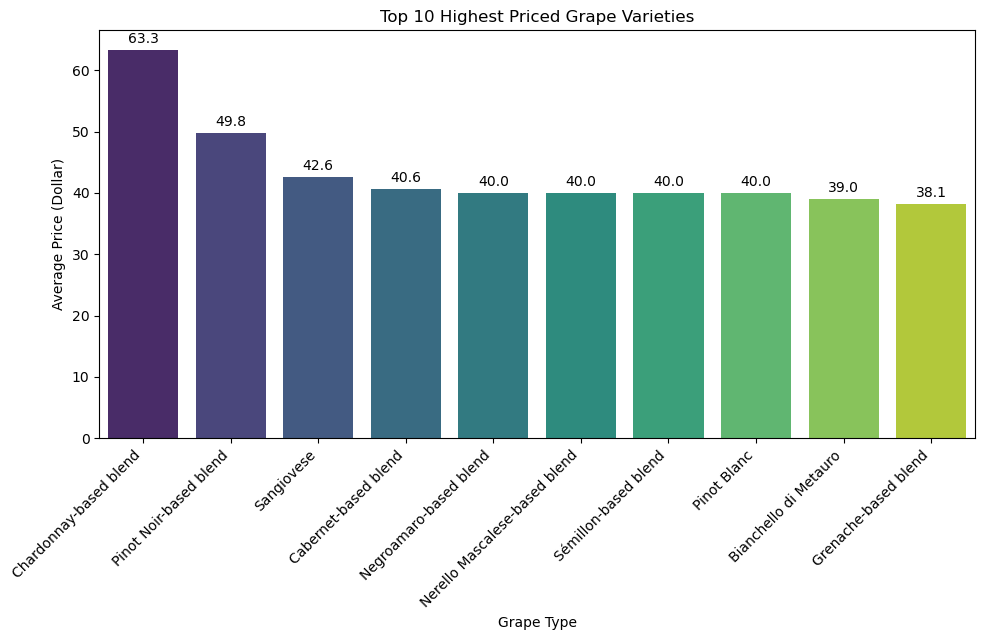

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and sort
avg_price_by_grape = wine.groupby('grapes_type')['price(dollar)'].mean().sort_values(ascending=False)
top_10_grapes = avg_price_by_grape.head(10)

# Convert to DataFrame for Seaborn
df = top_10_grapes.reset_index()
df.columns = ['grapes_type', 'avg_price']

plt.figure(figsize=(10,6.5))
ax = sns.barplot(data=df, x='grapes_type', y='avg_price', palette='viridis')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3)

plt.xlabel("Grape Type")
plt.ylabel("Average Price (Dollar)")
plt.title("Top 10 Highest Priced Grape Varieties")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Insights
- **Chardonnay-based blends** have the **highest average price**, indicating they are positioned as premium wines.
- **Pinot Noir-based blends** also show higher pricing, suggesting strong demand or higher production quality.
- Most of the other grape varieties (like **Sangiovese** and **Cabernet-based blends**) have **moderate but consistent pricing**.
- Overall, the chart shows that **blend varieties often fall into the higher-price segment**, reflecting their craftsmanship or aging process.


### 5.To compare revenue patterns across countries and determine whether certain wine-producing regions dominate high-value sales.

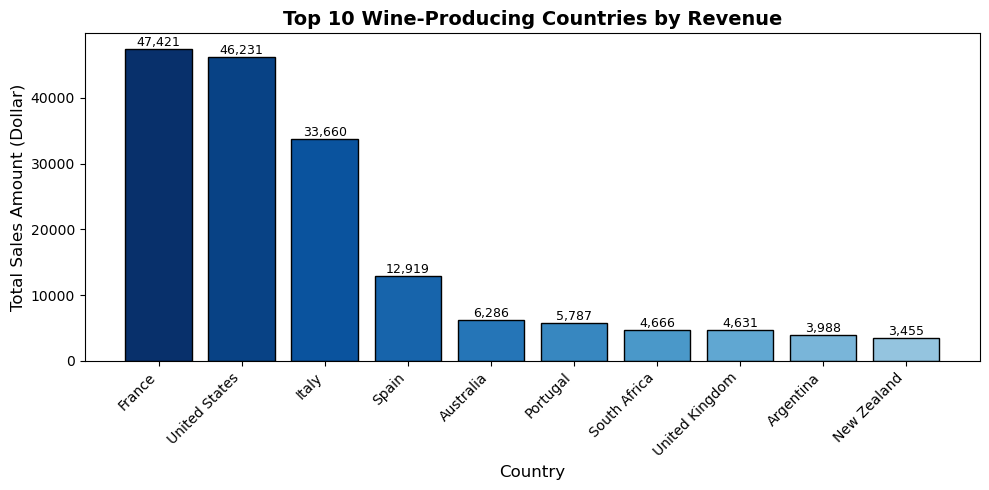

In [28]:
revenue_by_country = wine.groupby('country')['total_amount(dollar)'].sum().sort_values(ascending=False)
top_10_revenue = revenue_by_country.head(10)

# Color palette with dark → light
colors = plt.cm.Blues(np.linspace(1, 0.4, len(top_10_revenue)))

plt.figure(figsize=(10,5))
bars = plt.bar(top_10_revenue.index, top_10_revenue.values, color=colors, edgecolor='black', linewidth=1)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.0f}", 
             ha='center', va='bottom', fontsize=9)

plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Sales Amount (Dollar)", fontsize=12)
plt.title("Top 10 Wine-Producing Countries by Revenue", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Insights
- **France** generates the **highest revenue**, showing strong global demand and premium pricing for French wines.
- The **United States** and **Italy** are also major contributors, indicating a strong wine market and production scale.
- Countries like **Spain, Australia, and Portugal** generate **moderate revenue**, likely due to competitive pricing and regional popularity.
- **New Zealand and Argentina** have the **lowest revenue** among the top 10, suggesting smaller production scale or more niche market reach.


# 3.Multivariate Analysis

### 1.To analyze how grape varieties and country of origin together influence wine pricing, and identify which combinations lead to premium-priced wines.

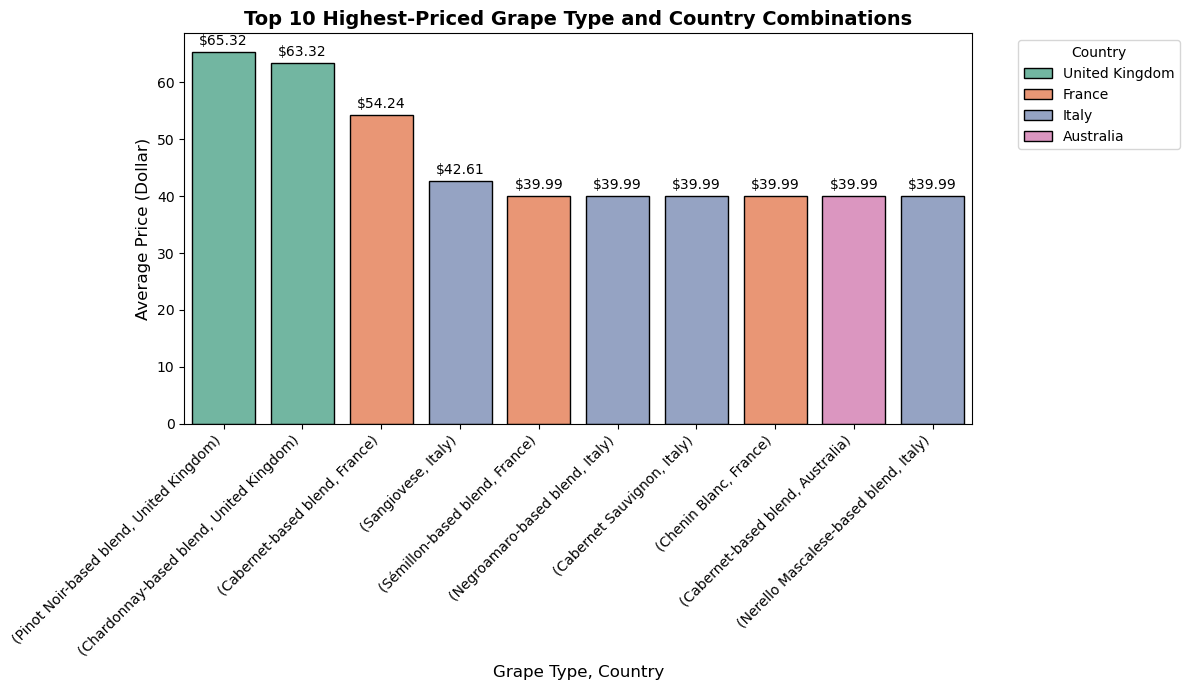

In [48]:
# Group and sort
combo_prices = wine.groupby(['grapes_type', 'country'])['price(dollar)'].mean()
top_10_combinations = combo_prices.sort_values(ascending=False).head(10)

# Convert index to DataFrame
df = top_10_combinations.reset_index()

# Create a combined label for x-axis
df['label'] = df.apply(lambda row: f"({row['grapes_type']}, {row['country']})", axis=1)

plt.figure(figsize=(12,7))
ax = sns.barplot(data=df, x='label', y='price(dollar)', hue='country', palette='Set2', edgecolor='black')

# ---- Add Data Labels ----
for container in ax.containers:
    ax.bar_label(container, fmt='$%.2f', padding=3)

plt.title("Top 10 Highest-Priced Grape Type and Country Combinations", fontsize=14, fontweight='bold')
plt.xlabel("Grape Type, Country", fontsize=12)
plt.ylabel("Average Price (Dollar)", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Insights
- The **United Kingdom** has the **highest-priced** grape blends, especially Pinot Noir-based and Chardonnay-based blends.
- **France** also appears in the top high-price combinations, particularly for **Cabernet-based blends**.
- **Italy** has multiple grape-country combinations listed but at a **lower price range (~$40)** compared to UK and France.
- **Australia** appears only once in the top 10, showing it has **fewer premium-priced blends** compared to the other countries.


### 2.To understand how wine age and country together impact total sales value and demand in the market.

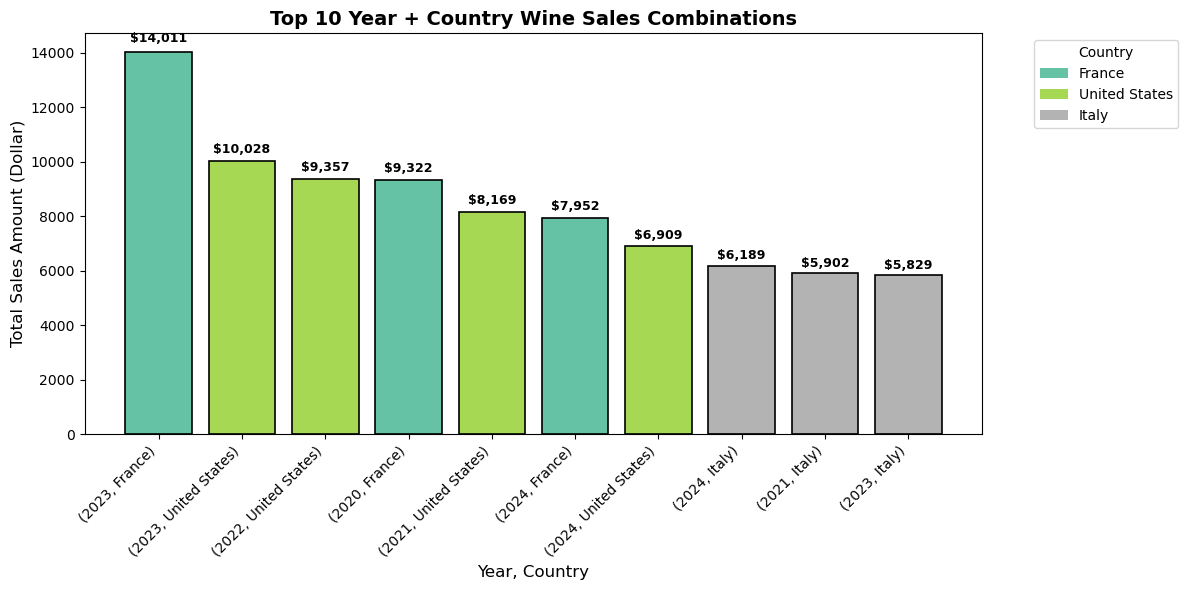

In [18]:
# Group and sort
combo_sales = wine.groupby(['year', 'country'])['total_amount(dollar)'].sum().sort_values(ascending=False).head(10)

# Convert index to DataFrame
df = combo_sales.reset_index()

# Unique countries
countries = df['country'].unique()

# Create a color map (professional palette)
color_map = {country: color for country, color in zip(countries, plt.cm.Set2(np.linspace(0, 1, len(countries))))}

# Assign colors based on country
colors = df['country'].map(color_map)

# Labels for x-axis
labels = df.apply(lambda row: f"({row['year']}, {row['country']})", axis=1)

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(labels, df['total_amount(dollar)'], color=colors, edgecolor='black', linewidth=1.2)

plt.title("Top 10 Year + Country Wine Sales Combinations", fontsize=14, fontweight='bold')
plt.xlabel("Year, Country", fontsize=12)
plt.ylabel("Total Sales Amount (Dollar)", fontsize=12)
plt.xticks(rotation=45, ha='right')

# ---- Add Data Labels ----
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + (height * 0.02),   # small offset above bar
             f"${height:,.0f}",          # formatted label with commas
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add legend
for country in countries:
    plt.bar(0, 0, color=color_map[country], label=country)  # dummy invisible bars for legend
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Insights
- **France (2023)** has the highest sales, showing strong market demand for recent French wine production.
- The **United States** also shows consistently high sales across multiple years, indicating stable consumer demand.
- **Italy** appears in the top 10 but with **lower total sales** compared to France and the U.S., suggesting a smaller market share.
- Overall, **recent years (2021–2024)** dominate the top sales combinations, showing that **newer vintage wines are driving current sales trends.**


### 3.To identify which grape varieties are more popular in specific countries based on customer review activity.

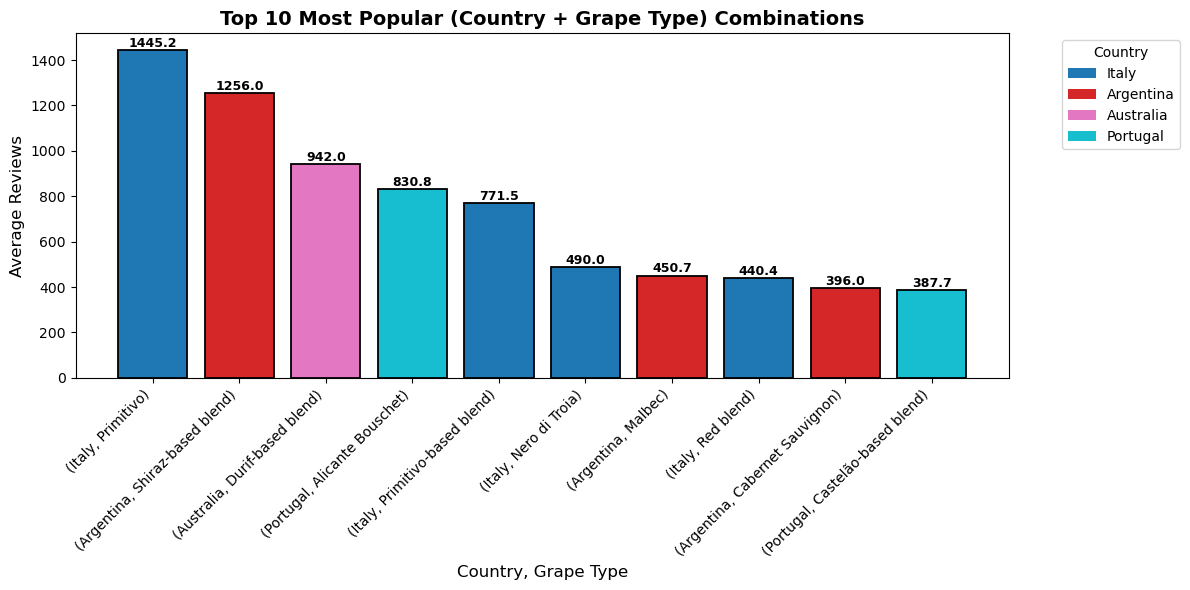

In [19]:
# Group and sort
combo_reviews = wine.groupby(['country', 'grapes_type'])['reviews'].mean().sort_values(ascending=False).head(10)

# Convert index to DataFrame
df = combo_reviews.reset_index()

# Unique countries
countries = df['country'].unique()

# Use a strong, distinct color palette
color_map = {country: color for country, color in zip(countries, plt.cm.tab10(np.linspace(0, 1, len(countries))))}

# Assign color to each bar based on country
colors = df['country'].map(color_map)

# Create x labels
labels = df.apply(lambda row: f"({row['country']}, {row['grapes_type']})", axis=1)

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(labels, df['reviews'], color=colors, edgecolor='black', linewidth=1.3)

plt.title("Top 10 Most Popular (Country + Grape Type) Combinations", fontsize=14, fontweight='bold')
plt.xlabel("Country, Grape Type", fontsize=12)
plt.ylabel("Average Reviews", fontsize=12)
plt.xticks(rotation=45, ha='right')

# ---- Add Data Labels ----
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.5,      # slight spacing above bar
             f"{height:.1f}",   # formatted label
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add legend
for country in countries:
    plt.bar(0, 0, color=color_map[country], label=country)  # invisible for legend

plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Insights
- **Italy – Primitivo** has the highest average reviews, showing it is the **most popular and well-received** combination.
- **Argentina’s Shiraz-based blend** also ranks high, indicating strong consumer appreciation for bold red varieties.
- **Australia and Portugal** appear in the top combinations, but with **moderate review counts** compared to Italy and Argentina.
- Overall, **Italy and Argentina dominate** the popularity rankings, suggesting strong global preference for their grape styles.
